In [212]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Loading file
file_path = "Survey_Data (original - 95 responses)_new.xlsx"
data_file = pd.read_excel(file_path)

# Displaying column names to check formatting
print(data_file.columns)

Index(['Timestamp', 'Gender', 'Age', 'How often do you shop online?',
       'Preferences',
       '"Online shopping will replace physical stores in the future"',
       'For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Website Quality - (e.g. design & usability)]',
       'For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Security & Privacy - (e.g. customer details)]',
       'For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Product - (e.g. Product Variety, Prices, Brands)]',
       'For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Convenience - (e.g. time-saving, quality of info)]',
       'For you, how important are the following factors for customer satisfaction in

In [213]:
#Checking null Values
data_file.isnull().sum()

Timestamp                                                                                                                                                                                                                     0
Gender                                                                                                                                                                                                                        0
Age                                                                                                                                                                                                                           0
How often do you shop online?                                                                                                                                                                                                 0
Preferences                                                                                             

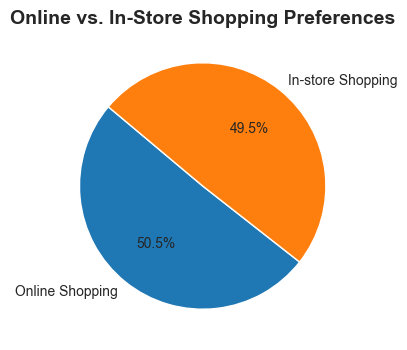

In [214]:
# Counting the number of responses for each shopping preference
preference_counts = data_file["Preferences"].value_counts()

# Creating a Pie Chart
plt.figure(figsize=(4, 4))
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Online vs. In-Store Shopping Preferences", fontsize=14, fontweight="bold")
plt.show()

C:\Users\Mega Providers\AppData\Local\Temp\ipykernel_10604\4123298717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shopping_frequency_counts.index, y=shopping_frequency_counts.values, palette="viridis")


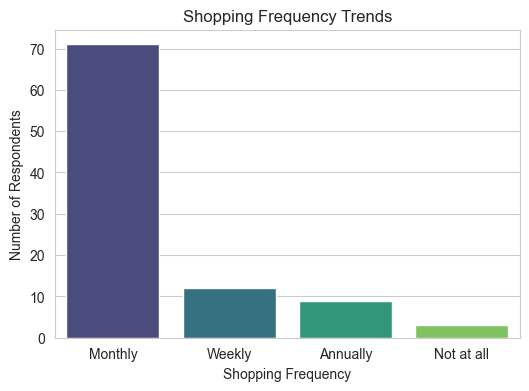

In [215]:
# Counting the number of responses for each shopping frequency
shopping_frequency_counts = data_file["How often do you shop online?"].value_counts()

# Creating a Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=shopping_frequency_counts.index, y=shopping_frequency_counts.values, palette="viridis")
plt.xlabel("Shopping Frequency")
plt.ylabel("Number of Respondents")
plt.title("Shopping Frequency Trends") 
plt.show()

In [216]:
age_column = "Age"
# Counting responses by age group
age_group_counts = data_file[age_column].value_counts()
print("Responses by Age Group:")
print(age_group_counts)

Responses by Age Group:
Age
18 - 24       53
25 - 34       33
35 - 44        6
45 or over     3
Name: count, dtype: int64


C:\Users\Mega Providers\AppData\Local\Temp\ipykernel_10604\3756719585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")


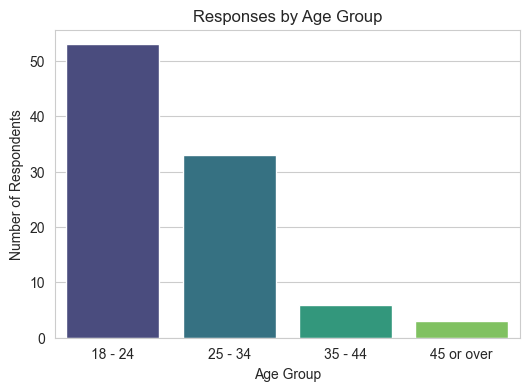

In [217]:
# Creating a Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.title("Responses by Age Group") 
plt.show()

In [218]:
gender_column = "Gender"
# Counting responses by gender
gender_counts = data_file[gender_column].value_counts()
print("\nResponses by Gender:")
print(gender_counts)


Responses by Gender:
Gender
Male      52
Female    43
Name: count, dtype: int64


C:\Users\Mega Providers\AppData\Local\Temp\ipykernel_10604\2343526389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


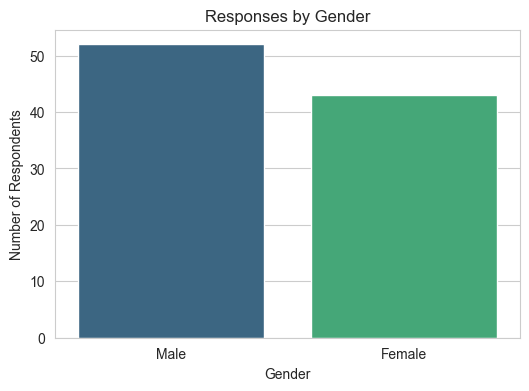

In [219]:
# Creating a Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.title("Responses by Gender") 
plt.show()

In [220]:
# First we check relation between age and other columns
age_column = "Age" 
response_column = "How often do you shop online?"

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values)

# Computing Chi-Square value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and How often they shop online?.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                            18 - 24  25 - 34  35 - 44  45 or over
How often do you shop online?                                       
Annually                             7        2        0           0
Monthly                             36       27        6           2
Not at all                           2        1        0           0
Weekly                               8        3        0           1

Expected Values:
 Age                              18 - 24    25 - 34   35 - 44  45 or over
How often do you shop online?                                            
Annually                        5.021053   3.126316  0.568421    0.284211
Monthly                        39.610526  24.663158  4.484211    2.242105
Not at all                      1.673684   1.042105  0.189474    0.094737
Weekly                          6.694737   4.168421  0.757895    0.378947

Chi-Square Value: 5.834673244984167
Reduced Chi-Square Value: 0.648297027220463
p-Value: 0.7563441194385

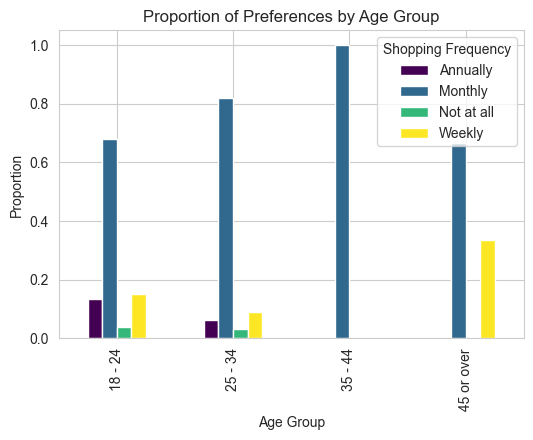

In [221]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Preferences by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Shopping Frequency")
plt.show()

In [223]:
# checking relation between Gender and other columns
age_column = "Gender" 
response_column = "How often do you shop online?"

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values)

# Computing Chi-Square value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between gender and How often they shop online?.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                         Female  Male
How often do you shop online?              
Annually                            6     3
Monthly                            32    39
Not at all                          1     2
Weekly                              4     8

Expected Values:
 Gender                            Female       Male
How often do you shop online?                      
Annually                        4.073684   4.926316
Monthly                        32.136842  38.863158
Not at all                      1.357895   1.642105
Weekly                          5.431579   6.568421

Chi-Square Value: 2.526854628066551
Reduced Chi-Square Value: 0.8422848760221836
p-Value: 0.4704573942115472
Degrees of Freedom: 3
Conclusion: No significant relationship found.


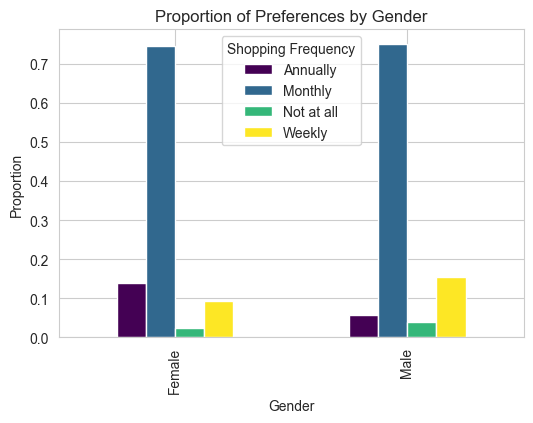

In [224]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Preferences by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Shopping Frequency")
plt.show()

In [225]:
age_column = "Age" 
response_column = "Preferences"

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and Shopping Preferences.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                18 - 24  25 - 34  35 - 44  45 or over
Preferences                                             
In-store Shopping       28       12        4           3
Online Shopping         25       21        2           0

Expected Values:
 Age                  18 - 24    25 - 34   35 - 44  45 or over
Preferences                                                  
In-store Shopping  26.221053  16.326316  2.968421    1.484211
Online Shopping    26.778947  16.673684  3.031579    1.515789

Chi-Square Value: 6.2811931032525194
Reduced Chi-Square Value: 2.0937310344175066
p-Value: 0.09870284571284414
Degrees of Freedom: 3
Conclusion: No significant relationship found.


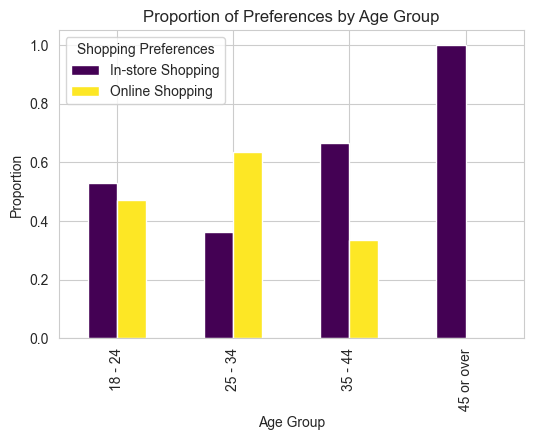

In [226]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Preferences by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Shopping Preferences")
plt.show()

In [227]:
age_column = "Gender" 
response_column = "Preferences"

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Gender and Shopping Preferences.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender             Female  Male
Preferences                    
In-store Shopping      24    23
Online Shopping        19    29

Expected Values:
 Gender                Female       Male
Preferences                            
In-store Shopping  21.273684  25.726316
Online Shopping    21.726316  26.273684

Chi-Square Value: 0.8424292822003578
Reduced Chi-Square Value: 0.8424292822003578
p-Value: 0.3587029179530338
Degrees of Freedom: 1
Conclusion: No significant relationship found.


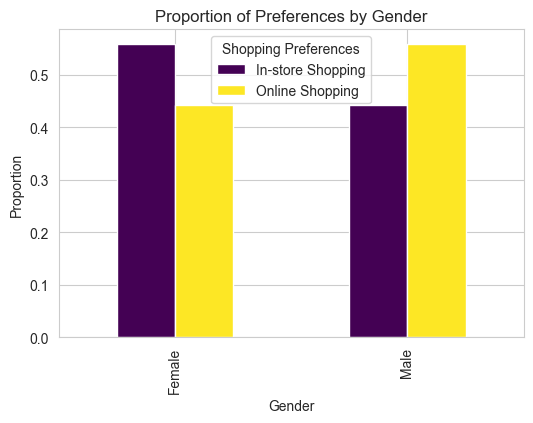

In [228]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Preferences by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Shopping Preferences")
plt.show()

In [230]:
age_column = "Age"
response_column = '"Online shopping will replace physical stores in the future"'

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values.to_string(index=True))

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results 
expected_value = pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns)
print("\nExpected Values:\n", expected_value.to_string(index=True)) #Using to.string for better formatting
print(f"\nChi-Square Values: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and Online shopping will replace physical stores in the future.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                                                           18 - 24  25 - 34  35 - 44  45 or over
"Online shopping will replace physical stores in the future"                                       
Agree                                                              27       15        2           0
Disagree                                                            8       10        3           2
Neither agree nor disagree                                         18        8        1           1

Expected Values:
 Age                                                             18 - 24    25 - 34   35 - 44  45 or over
"Online shopping will replace physical stores in the future"                                            
Agree                                                         24.547368  15.284211  2.778947    1.389474
Disagree                                                      12.831579   7.989474  1.452632    0.726316
Neither agree nor disagree                 

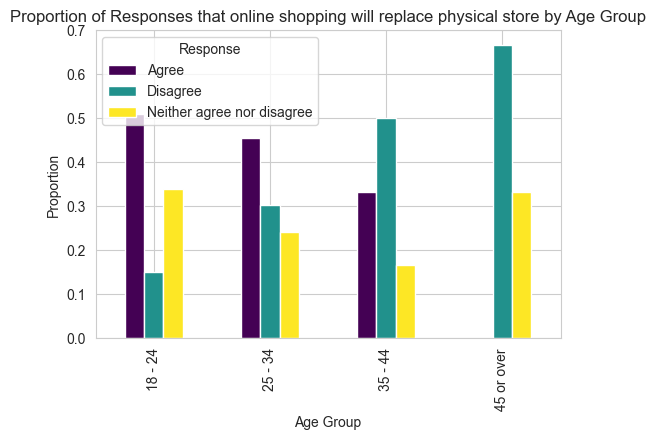

In [231]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses that online shopping will replace physical store by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Response")
plt.show()

In [232]:
age_column = "Gender"
response_column = '"Online shopping will replace physical stores in the future"'

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values.to_string(index=True))

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
expected_value = pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns)
print("\nExpected Values:\n", expected_value.to_string(index=True))
print(f"\nChi-Square Values: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Gender and Online shopping will replace physical stores in the future.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                                                        Female  Male
"Online shopping will replace physical stores in the future"              
Agree                                                             19    25
Disagree                                                          12    11
Neither agree nor disagree                                        12    16

Expected Values:
 Gender                                                           Female       Male
"Online shopping will replace physical stores in the future"                      
Agree                                                         19.915789  24.084211
Disagree                                                      10.410526  12.589474
Neither agree nor disagree                                    12.673684  15.326316

Chi-Square Values: 0.5857138942957952
Reduced Chi-Square Value: 0.2928569471478976
p-Value: 0.7461288689258865
Degrees of Freedom: 2
Conclusion: No significant relationship

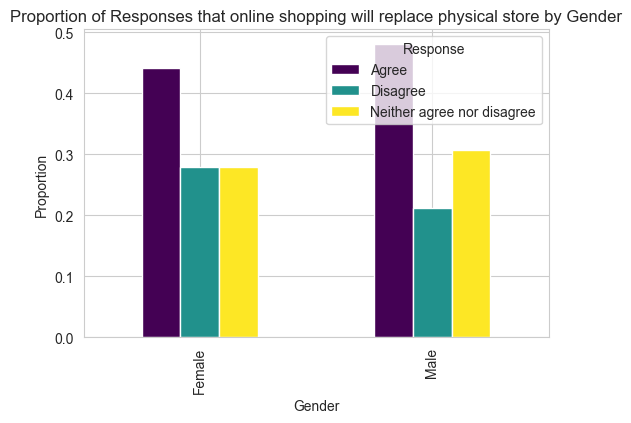

In [233]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses that online shopping will replace physical store by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Response")
plt.show()

In [236]:

age_column = "Age"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Website Quality - (e.g. design & usability)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Display results
print("\nExpected Value:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and opinion on website quality for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                                                 18 - 24  25 - 34  35 - 44  \
For you, how important are the following factor...                              
Extremely important                                      31       22        3   
Fairly Important                                         14        7        1   
Important                                                 4        4        2   
Slightly Important                                        2        0        0   

Age                                                 45 or over  
For you, how important are the following factor...              
Extremely important                                          3  
Fairly Important                                             0  
Important                                                    0  
Slightly Important                                           0  

Expected Value:
 Age                                                   18 - 24    25 - 34  \
For you, ho

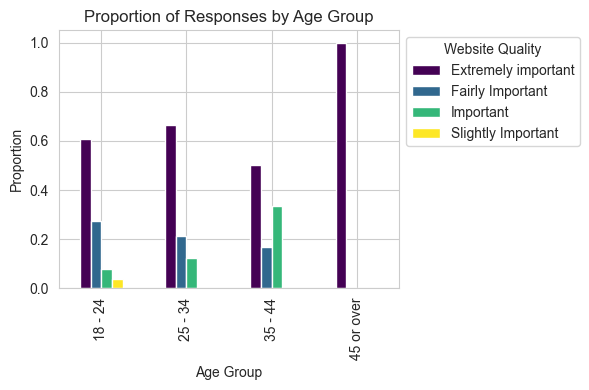

In [237]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Website Quality", bbox_to_anchor=(1, 1), loc='upper left')  # Reposition the legend for better visulization
plt.tight_layout()
plt.show()

In [240]:
age_column = "Gender"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Website Quality - (e.g. design & usability)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Display results
print("\nExpected Value:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Gender and opinion on website quality for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                                              Female  Male
For you, how important are the following factor...              
Extremely important                                     32    27
Fairly Important                                         8    14
Important                                                2     8
Slightly Important                                       1     1

Expected Value:
 Gender                                                 Female       Male
For you, how important are the following factor...                      
Extremely important                                 27.279570  31.720430
Fairly Important                                    10.172043  11.827957
Important                                            4.623656   5.376344
Slightly Important                                   0.924731   1.075269

Chi-Square Value: 5.162458092951588
Reduced Chi-Square Value: 1.7208193643171958
p-Value: 0.16028042701560366
Degrees of Freedom: 3
Con

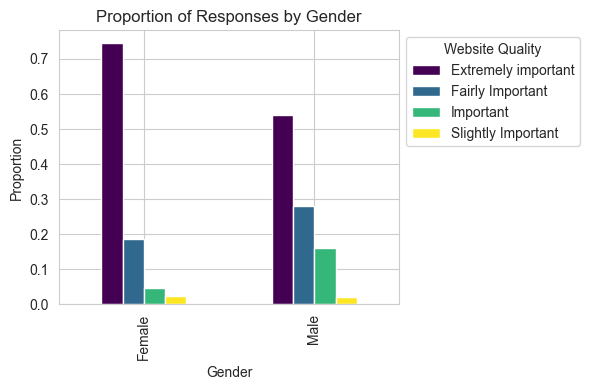

In [241]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Website Quality", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [242]:
age_column = "Age"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Security & Privacy - (e.g. customer details)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed frequencies
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and opinion on security and privacy for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                                                 18 - 24  25 - 34  35 - 44  \
For you, how important are the following factor...                              
Extremely important                                      40       27        5   
Fairly Important                                          5        2        0   
Important                                                 3        3        1   
Not important at all                                      1        0        0   
Slightly Important                                        1        0        0   

Age                                                 45 or over  
For you, how important are the following factor...              
Extremely important                                          2  
Fairly Important                                             1  
Important                                                    0  
Not important at all                                         0  
Slightly Important      

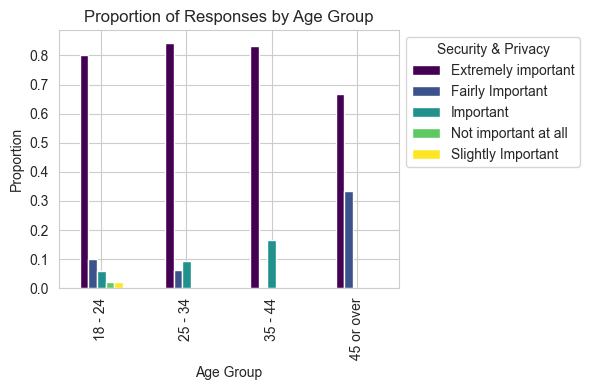

In [243]:
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Security & Privacy", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [244]:
age_column = "Gender"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Security & Privacy - (e.g. customer details)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed frequencies
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Gender and opinion on security and privacy for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                                              Female  Male
For you, how important are the following factor...              
Extremely important                                     34    40
Fairly Important                                         4     4
Important                                                3     4
Not important at all                                     0     1
Slightly Important                                       1     0

Expected Values:
 Gender                                                 Female       Male
For you, how important are the following factor...                      
Extremely important                                 34.153846  39.846154
Fairly Important                                     3.692308   4.307692
Important                                            3.230769   3.769231
Not important at all                                 0.461538   0.538462
Slightly Important                                   0.461538   0.5384

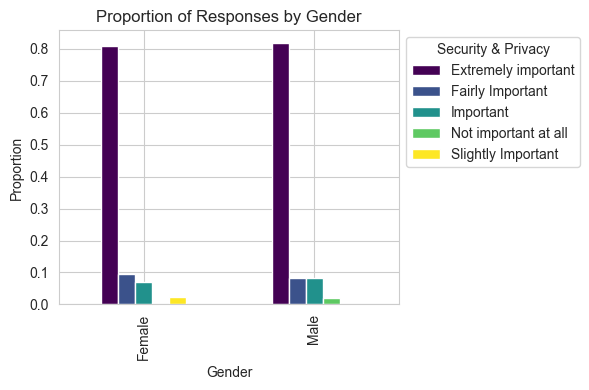

In [245]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Security & Privacy", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [246]:
age_column = "Age"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Product - (e.g. Product Variety, Prices, Brands)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Display results
print("\nExpected Value:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and opinion on product quality for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                                                 18 - 24  25 - 34  35 - 44  \
For you, how important are the following factor...                              
Extremely important                                      31       19        3   
Fairly Important                                         13        9        2   
Important                                                 5        4        1   
Not important at all                                      1        0        0   

Age                                                 45 or over  
For you, how important are the following factor...              
Extremely important                                          2  
Fairly Important                                             1  
Important                                                    0  
Not important at all                                         0  

Expected Value:
 Age                                                   18 - 24    25 - 34  \
For you, ho

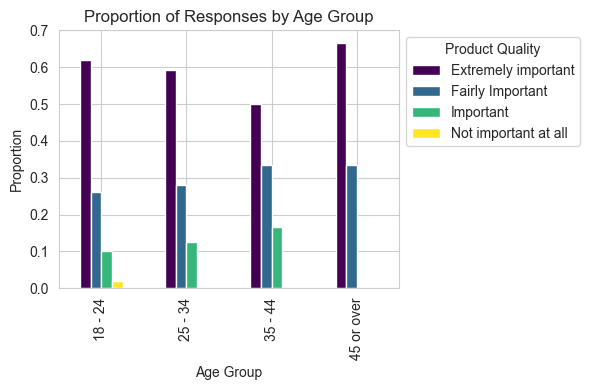

In [247]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Product Quality", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [248]:
age_column = "Gender"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Product - (e.g. Product Variety, Prices, Brands)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Value:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Gender and opinion on product quality for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                                              Female  Male
For you, how important are the following factor...              
Extremely important                                     30    25
Fairly Important                                         9    16
Important                                                3     7
Not important at all                                     0     1

Expected Value:
 Gender                                                 Female       Male
For you, how important are the following factor...                      
Extremely important                                 25.384615  29.615385
Fairly Important                                    11.538462  13.461538
Important                                            4.615385   5.384615
Not important at all                                 0.461538   0.538462

Chi-Square Value: 4.502727272727273
Reduced Chi-Square Value: 1.500909090909091
p-Value: 0.21204714982625325
Degrees of Freedom: 3
Conc

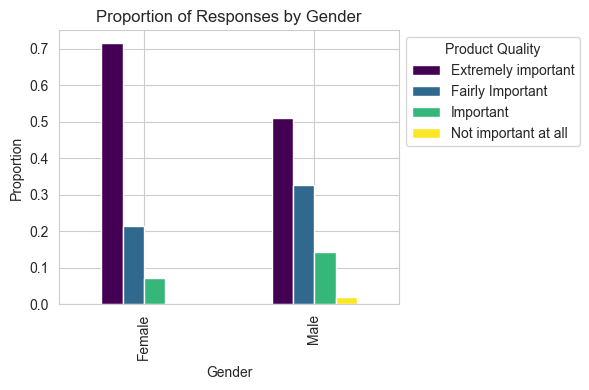

In [249]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Product Quality", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [250]:
age_column = "Age"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Convenience - (e.g. time-saving, quality of info)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Values
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Values: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and opinion on convenience for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                                                 18 - 24  25 - 34  35 - 44  \
For you, how important are the following factor...                              
Extremely important                                      19       19        3   
Fairly Important                                         18       10        2   
Important                                                10        3        1   
Not important at all                                      1        0        0   

Age                                                 45 or over  
For you, how important are the following factor...              
Extremely important                                          3  
Fairly Important                                             0  
Important                                                    0  
Not important at all                                         0  

Expected Values:
 Age                                                   18 - 24    25 - 34  \
For you, h

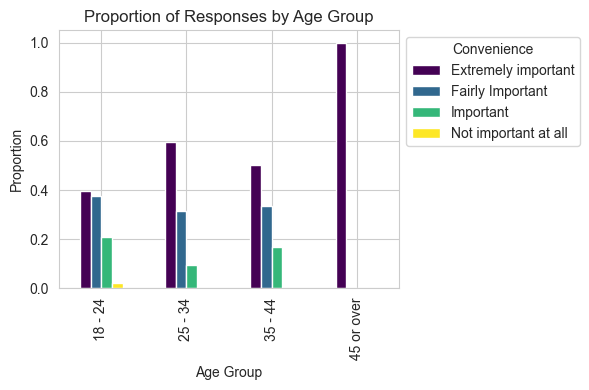

In [251]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Convenience", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [252]:
age_column = "Gender"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Convenience - (e.g. time-saving, quality of info)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Values
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Values: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Gender and opinion on convenience for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                                              Female  Male
For you, how important are the following factor...              
Extremely important                                     24    20
Fairly Important                                        13    17
Important                                                4    10
Not important at all                                     0     1

Expected Values:
 Gender                                                 Female       Male
For you, how important are the following factor...                      
Extremely important                                 20.269663  23.730337
Fairly Important                                    13.820225  16.179775
Important                                            6.449438   7.550562
Not important at all                                 0.460674   0.539326

Chi-Square Values: 3.9422234100587774
Reduced Chi-Square Value: 1.3140744700195925
p-Value: 0.26777092344358705
Degrees of Freedom: 3


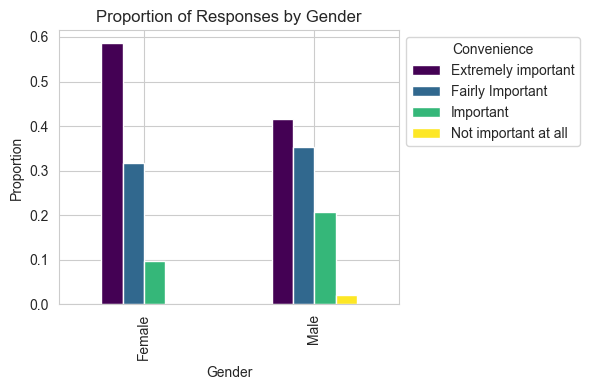

In [253]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Convenience", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [254]:
age_column = "Age"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Logistics - (e.g. delivery time, speed of delivery, Tracking & Tracing Orders, updates)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Values
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and opinion on logistics for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Age                                                 18 - 24  25 - 34  35 - 44  \
For you, how important are the following factor...                              
Extremely important                                      28       23        4   
Fairly Important                                         13        6        1   
Important                                                 4        3        1   
Not important at all                                      1        0        0   
Slightly Important                                        2        0        0   

Age                                                 45 or over  
For you, how important are the following factor...              
Extremely important                                          3  
Fairly Important                                             0  
Important                                                    0  
Not important at all                                         0  
Slightly Important      

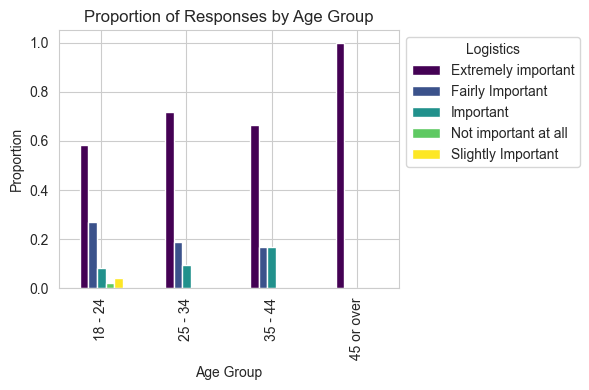

In [255]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.legend(title="Logistics", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [256]:
age_column = "Gender"
response_column = "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Logistics - (e.g. delivery time, speed of delivery, Tracking & Tracing Orders, updates)]"

# Droping rows with multiple responses
data_file = data_file[~data_file[response_column].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(data_file[response_column], data_file[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Values
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between ender and opinion on logistics for online shopping.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                                              Female  Male
For you, how important are the following factor...              
Extremely important                                     30    28
Fairly Important                                         8    12
Important                                                2     6
Not important at all                                     0     1
Slightly Important                                       1     1

Expected Values:
 Gender                                                 Female       Male
For you, how important are the following factor...                      
Extremely important                                 26.719101  31.280899
Fairly Important                                     9.213483  10.786517
Important                                            3.685393   4.314607
Not important at all                                 0.460674   0.539326
Slightly Important                                   0.921348   1.0786

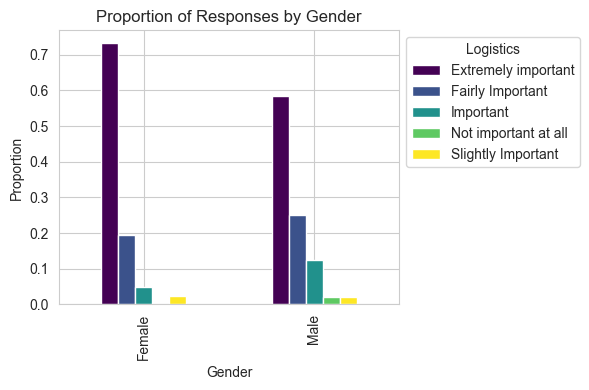

In [257]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Responses by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(title="Logistics", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [258]:
# Renaming columns
rename_dict = {
    "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Website Quality - (e.g. design & usability)]": "Website Quality", 
    "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Security & Privacy - (e.g. customer details)]": "Security & Privacy", 
    "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Product - (e.g. Product Variety, Prices, Brands)]": "Product", 
    "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Convenience - (e.g. time-saving, quality of info)]": "Convenience",
    "For you, how important are the following factors for customer satisfaction in Online Shopping? Please tick only ONE box per row. [Logistics - (e.g. delivery time, speed of delivery, Tracking & Tracing Orders, updates)]": "Logistics"
}
data_file = data_file.rename(columns=rename_dict)


In [260]:
# Calculating combine values
age_column = "Age"
factor_columns = ["Website Quality", "Security & Privacy", "Product", "Convenience","Logistics"] 

# Reshaping Data into Long Format
data_file_long = data_file.melt(id_vars=[age_column], value_vars=factor_columns, var_name="Factor", value_name="Response")

# Droping rows where multiple responses
data_file_long = data_file_long[~data_file_long["Response"].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(index=[data_file_long["Factor"], data_file_long["Response"]], columns=data_file_long[age_column])

print("Observed Values:\n", observed_values.to_string(index=True))

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
expected_value = pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns)
print("\nExpected Values:\n", expected_value.to_string(index=True)) 
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and customer satisfaction factors.")
else:
    print("Conclusion: No significant relationship found.")


Observed Values:
 Age                                      18 - 24  25 - 34  35 - 44  45 or over
Factor             Response                                                   
Convenience        Extremely important        19       19        3           3
                   Fairly Important           18       10        2           0
                   Important                  10        3        1           0
                   Not important at all        1        0        0           0
Logistics          Extremely important        28       23        4           3
                   Fairly Important           13        6        1           0
                   Important                   4        3        1           0
                   Not important at all        1        0        0           0
                   Slightly Important          2        0        0           0
Product            Extremely important        30       19        3           2
                   Fairly Importan

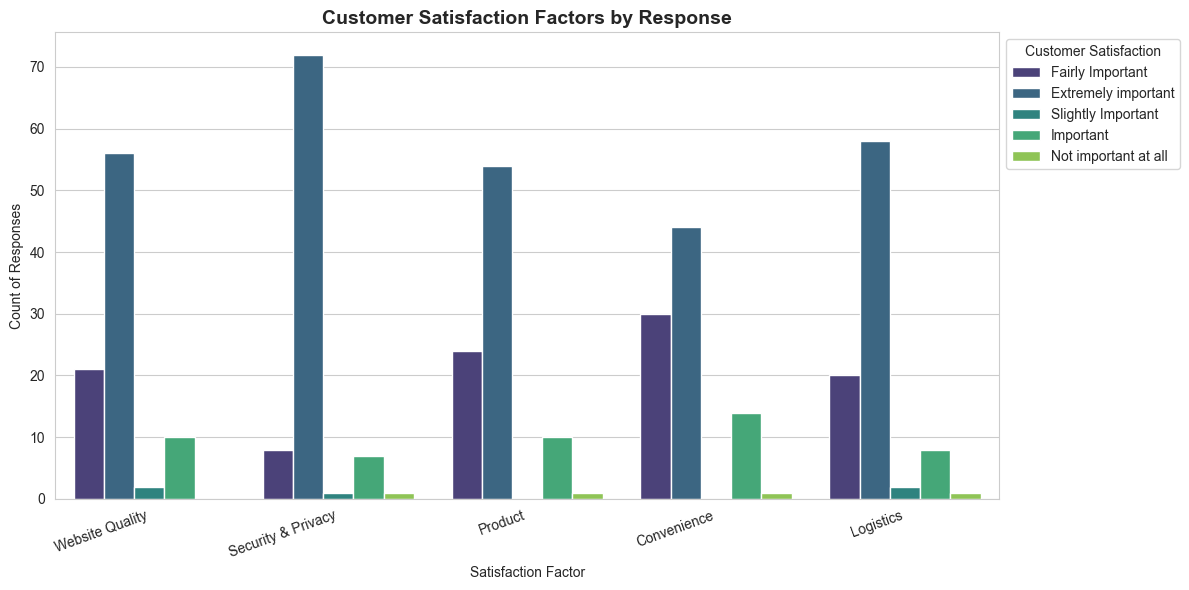

In [261]:
# Plotting all reponses
# Rename columns
factor_columns = ["Website Quality", "Security & Privacy", "Product", "Convenience","Logistics"] 

age_column = "Age"
factor_columns = list(rename_dict.values()) 

# Reshaping Data into Long Format
data_file_long = data_file.melt(id_vars=[age_column], value_vars=factor_columns, var_name="Factor", value_name="Response")

# Droping rows where multiple responses
data_file_long = data_file_long[~data_file_long["Response"].str.contains(r',|/', regex=True, na=False)]

# Plotting Relation as bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data_file_long, x="Factor", hue="Response", palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=20, ha="right")
plt.title("Customer Satisfaction Factors by Response", fontsize=14, fontweight="bold")
plt.xlabel("Satisfaction Factor")
plt.ylabel("Count of Responses")
plt.legend(title="Customer Satisfaction", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Calculating combine values
age_column = "Gender"
factor_columns = ["Website Quality", "Security & Privacy", "Product", "Convenience","Logistics"] 

# Reshaping Data into Long Format
data_file_long = data_file.melt(id_vars=[age_column], value_vars=factor_columns, var_name="Factor", value_name="Response")

# Droping rows where multiple responses
data_file_long = data_file_long[~data_file_long["Response"].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(index=[data_file_long["Factor"], data_file_long["Response"]], columns=data_file_long[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Gender and customer satisfaction factors.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Gender                                   Female  Male
Factor             Response                          
Convenience        Extremely important       24    20
                   Fairly Important          13    17
                   Important                  4    10
                   Not important at all       0     1
Logistics          Extremely important       30    28
                   Fairly Important           8    12
                   Important                  2     6
                   Not important at all       0     1
                   Slightly Important         1     1
Product            Extremely important       30    24
                   Fairly Important           8    16
                   Important                  3     7
                   Not important at all       0     1
Security & Privacy Extremely important       33    39
                   Fairly Important           4     4
                   Important                  3     4
          

In [263]:
# First we check relation between age and other columns
age_column = "Preferences" 
response_column = '"Online shopping will replace physical stores in the future"'

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values.to_string(index=True))

# Computing Chi-Square value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
expected_value = pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns)
print("\nExpected Values:\n", expected_value.to_string(index=True)) 
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Customer Preferences and will online shopping replace physical stores in future.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Preferences                                                   In-store Shopping  Online Shopping
"Online shopping will replace physical stores in the future"                                    
Agree                                                                        18               21
Disagree                                                                     13                9
Neither agree nor disagree                                                   15               13

Expected Values:
 Preferences                                                   In-store Shopping  Online Shopping
"Online shopping will replace physical stores in the future"                                    
Agree                                                                 20.157303        18.842697
Disagree                                                              11.370787        10.629213
Neither agree nor disagree                                            14.471910        13.

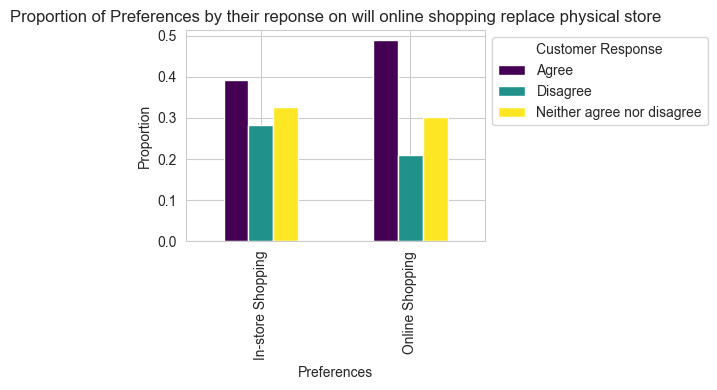

In [264]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Preferences by their reponse on will online shopping replace physical store")
plt.xlabel("Preferences")
plt.ylabel("Proportion")
plt.legend(title="Customer Response", bbox_to_anchor=(1, 1), loc='upper left') 
plt.tight_layout()
plt.show()

In [265]:
# First we check relation between age and other columns
age_column = "Preferences" 
response_column = "How often do you shop online?"

observed_values = pd.crosstab(data_file[response_column], data_file[age_column])
print("Observed Values:\n", observed_values)

# Computing Chi-Square value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between Customer Preferences and will online shopping replace physical stores in future.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Preferences                    In-store Shopping  Online Shopping
How often do you shop online?                                    
Annually                                       6                2
Monthly                                       34               33
Not at all                                     3                0
Weekly                                         3                8

Expected Values:
 Preferences                    In-store Shopping  Online Shopping
How often do you shop online?                                    
Annually                                4.134831         3.865169
Monthly                                34.629213        32.370787
Not at all                              1.550562         1.449438
Weekly                                  5.685393         5.314607

Chi-Square Value: 7.194703817981514
Reduced Chi-Square Value: 2.398234605993838
p-Value: 0.06594413930013392
Degrees of Freedom: 3
Conclusion: No significant relationship

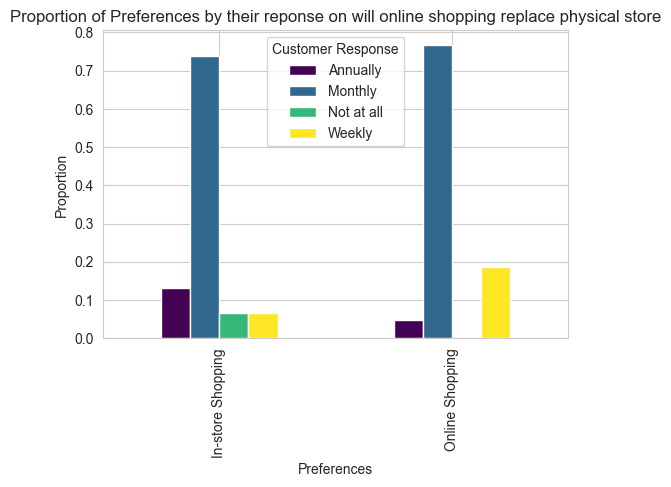

In [266]:
# Plotting Relation as bar chart
proportions = observed_values.div(observed_values.sum(axis=0), axis=1)
proportions.T.plot(kind="bar", figsize=(6, 4), colormap="viridis")
plt.title("Proportion of Preferences by their reponse on will online shopping replace physical store")
plt.xlabel("Preferences")
plt.ylabel("Proportion")
plt.legend(title="Customer Response")
plt.show()

In [268]:
# Calculating combine values
age_column = "Preferences"
factor_columns = ["Website Quality", "Security & Privacy", "Product", "Convenience","Logistics"] 

# Reshaping Data into Long Format
data_file_long = data_file.melt(id_vars=[age_column], value_vars=factor_columns, var_name="Factor", value_name="Response")

# Droping rows where multiple responses
data_file_long = data_file_long[~data_file_long["Response"].str.contains(r',|/', regex=True, na=False)]

# Computing observed Values
observed_values = pd.crosstab(index=[data_file_long["Factor"], data_file_long["Response"]], columns=data_file_long[age_column])

print("Observed Values:\n", observed_values)

# Computing Chi-Square Value
chi2, p, dof, expected = chi2_contingency(observed_values)

# Displaying results
print("\nExpected Values:\n", pd.DataFrame(expected, index=observed_values.index, columns=observed_values.columns))
print(f"\nChi-Square Value: {chi2}")
print(f"Reduced Chi-Square Value: {chi2/dof}")
print(f"p-Value: {p}")
print(f"Degrees of Freedom: {dof}")

alpha = 0.05
if p < alpha:
    print("Conclusion: There is a significant relationship between age and customer satisfaction factors.")
else:
    print("Conclusion: No significant relationship found.")

Observed Values:
 Preferences                              In-store Shopping  Online Shopping
Factor             Response                                                
Convenience        Extremely important                  22               22
                   Fairly Important                     16               14
                   Important                             7                7
                   Not important at all                  1                0
Logistics          Extremely important                  32               26
                   Fairly Important                      9               11
                   Important                             3                5
                   Not important at all                  1                0
                   Slightly Important                    1                1
Product            Extremely important                  25               29
                   Fairly Important                     14            